<a href="https://colab.research.google.com/github/SofiaShvedova/Programming-for-analysts/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%2029%2C04.2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from scipy import stats
 
import matplotlib
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

In [10]:
state=pd.read_csv('state.csv')
print(state)
print(state['Population'].mean())
print(stats.trim_mean(state['Population'], 0.1))
print(state['Population'].median())

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

In [6]:
!pip install wquantiles

In [7]:
from wquantiles import *
import weighted

In [11]:
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(weighted.median(state['Murder.Rate'], weights=state['Population']))

4.445833981123393
4.4


In [12]:
from statsmodels.robust.scale import mad

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


# **отображение процентилей уровня убийств по штатам.**

In [14]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

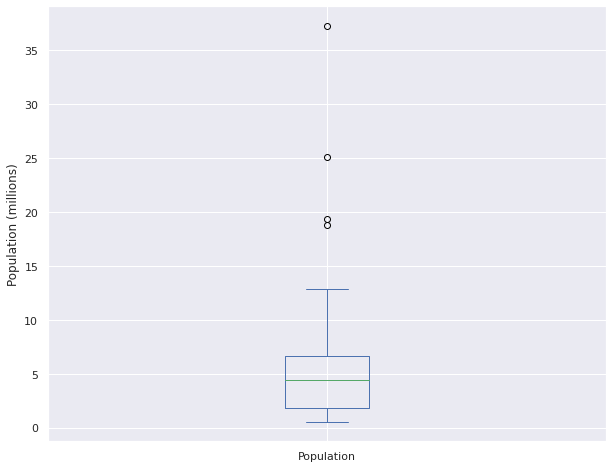

In [15]:
plt.figure(figsize=(10,8))
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

# **Частотная таблица населения**

In [16]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


Text(0.5, 0, 'Population (millions)')

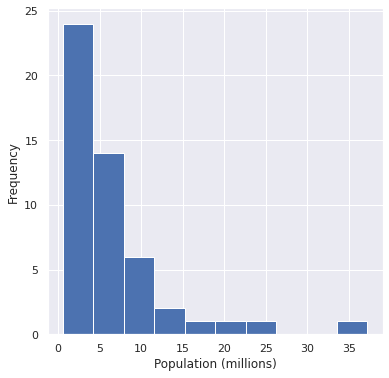

In [17]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(6, 6))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

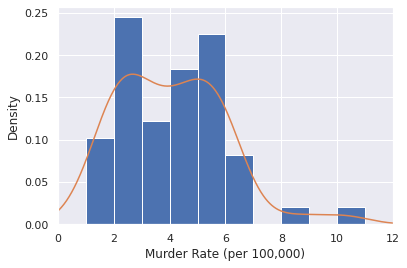

In [18]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax) 
ax.set_xlabel('Murder Rate (per 100,000)')

# **Изучение двоичных и категориальных данных**

In [19]:
from google.colab import files
uploaded = files.upload()

Saving dfw_airline.csv to dfw_airline.csv


In [20]:
dfw = pd.read_csv('dfw_airline.csv')
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Text(0, 0.5, 'Count')

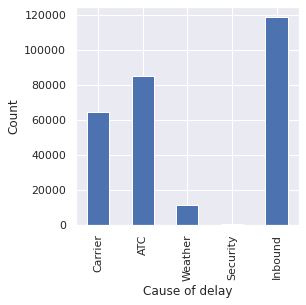

In [21]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [22]:
from google.colab import files
uploaded = files.upload()

Saving sp500_sectors.csv to sp500_sectors.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv', index_col=0)

In [ ]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
 
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

Из-за большого количества столбцов в этой таблице просмотр корреляционной матрицы затруднен, и удобнее построить корреляцию в виде тепловой карты. Пакет seaborn обеспечивает удобную реализацию тепловых карт.

In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

# **Форма биноминального распределения**

In [30]:
import scipy.stats as stats
n,r,p=8,3,0.6
stats.binom.pmf(r,n,p)

0.12386304000000009